In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("judges.csv", parse_dates=['doa', 'dor'])
df.sort_values("doa", inplace=True)
df.head()

,cj,doa,dor,gender,name
186,True,1950-01-26,1951-06-11,M,Hon’ble Mr. Justice Harilal Jekisundas Kania
187,True,1950-01-26,1954-03-01,M,Hon’ble Mr. Justice M. Patanjali Sastri
190,True,1950-01-26,1959-09-30,M,Hon’ble Mr. Justice Sudhi Ranjan Das
28,False,1950-01-26,1951-09-18,M,Hon’ble Mr. Justice Sir Saiyid Fazl Ali
189,True,1950-01-26,1956-01-31,M,Hon’ble Mr. Justice Bijan Kumar Mukherjea


In [3]:
df['tenure_days'] = (df['dor'] - df['doa']).apply(lambda x: x.days) + 1
df['tenure_years'] = df['tenure_days'] / 365
df['year'] = df.doa.apply(lambda x: x.year)
df['decade'] = (df['year'] // 10) * 10

In [4]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]

In [5]:
males.tenure_days.mean() / 365

5.501136433441857

In [6]:
females.tenure_days.mean()

1645.0

In [7]:
men_min = males.groupby('year').agg(np.min)
men_max = males.groupby('year').agg(np.max)
men_mean = males.groupby('year').agg(np.mean)

In [8]:
maxrec = males.ix[males.tenure_years.argmax()]
minrec = males.ix[males.tenure_years.argmin()]

In [9]:
minrec

cj                                                False
doa                                 1971-07-19 00:00:00
dor                                 1971-12-11 00:00:00
gender                                                M
name            Hon’ble Mr. Justice Subimal Chandra Roy
tenure_days                                         146
tenure_years                                        0.4
year                                               1971
decade                                             1970
Name: 54, dtype: object

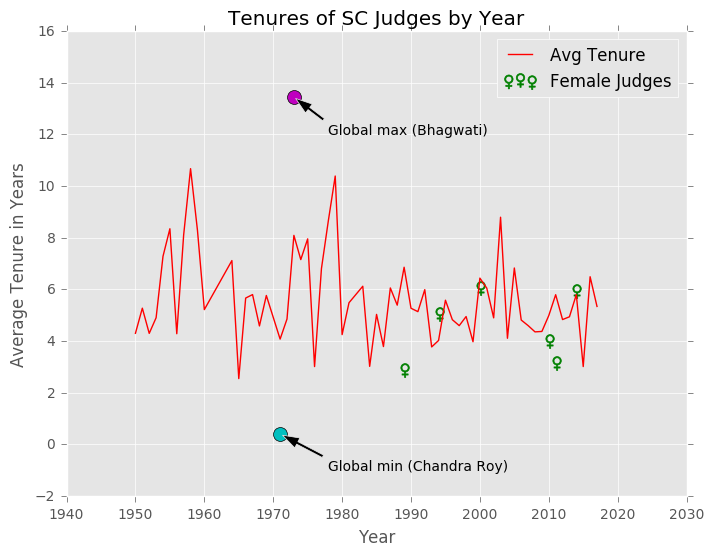

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#plt.plot(men_min.index, men_min['tenure_days'].values, "g-", label="Minimum")
#plt.scatter(men_min.index, men_min['tenure_days'].values, c="g", marker="o")
#plt.plot(men_max.index, men_max['tenure_days'].values, "r-", label="Maximum")
#plt.scatter(men_max.index, men_max['tenure_days'].values, c="r", marker="o")
ax.plot(men_mean.index, men_mean['tenure_years'].values, "r-", label="Avg Tenure")
#plt.scatter(men_mean.index, men_mean['tenure_days'].values, c="k", marker="o")
ax.scatter(females['year'].values, females['tenure_years'].values,
            marker="$\u2640$", s=100, label="Female Judges", color="g")
ax.plot(maxrec['year'], maxrec['tenure_years'], "mo", markersize=10)
ax.annotate("Global max (Bhagwati)", xy=(maxrec['year'], maxrec['tenure_years']),
            xytext=(1978, 12), arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
ax.plot(minrec['year'], minrec['tenure_years'], "co", markersize=10)
ax.annotate("Global min (Chandra Roy)", xy=(minrec['year'], minrec['tenure_years']),
            xytext=(1978, -1), arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
plt.xlabel("Year")
plt.ylabel("Average Tenure in Years")
plt.title("Tenures of SC Judges by Year")
plt.legend(loc="best")

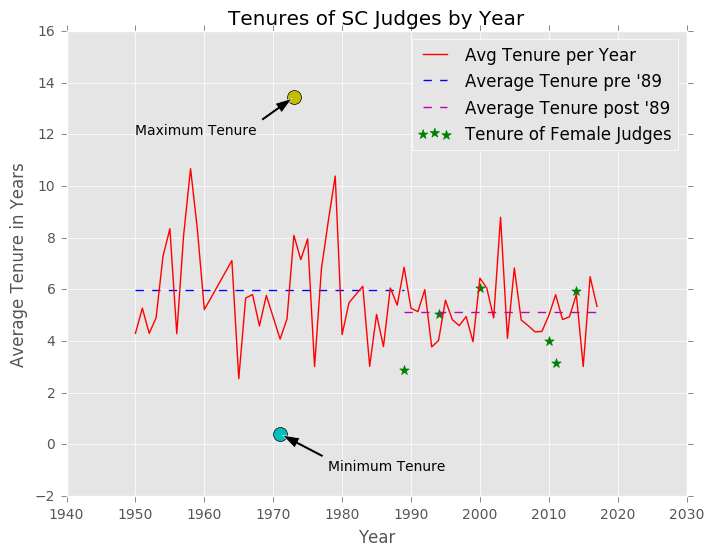

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#plt.plot(men_min.index, men_min['tenure_days'].values, "g-", label="Minimum")
#plt.scatter(men_min.index, men_min['tenure_days'].values, c="g", marker="o")
#plt.plot(men_max.index, men_max['tenure_days'].values, "r-", label="Maximum")
#plt.scatter(men_max.index, men_max['tenure_days'].values, c="r", marker="o")
ax.plot(men_mean.index, men_mean['tenure_years'].values, "r-", label="Avg Tenure per Year")
#plt.scatter(men_mean.index, men_mean['tenure_days'].values, c="k", marker="o")
pre_89 = males[males.year <= 1989]
post_89 = males[males.year > 1989]
ax.hlines(pre_89.tenure_years.mean(), 1950, 1989, "b",linestyles="dashed", label="Average Tenure pre '89")
ax.hlines(post_89.tenure_years.mean(), 1989, 2017, "m",linestyles="dashed", label="Average Tenure post '89")
#ax.scatter(females['year'].values, females['tenure_years'].values,
#            marker="$\u2640$", s=100, label="Female Judges", color="g")
ax.scatter(females['year'].values, females['tenure_years'].values,
           marker="*", s=50, label="Tenure of Female Judges", color="g")

ax.plot(maxrec['year'], maxrec['tenure_years'], "yo", markersize=10)
ax.annotate("Maximum Tenure", xy=(maxrec['year'], maxrec['tenure_years']),
            xytext=(1950, 12), arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
ax.plot(minrec['year'], minrec['tenure_years'], "co", markersize=10)
ax.annotate("Minimum Tenure", xy=(minrec['year'], minrec['tenure_years']),
            xytext=(1978, -1), arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
plt.xlabel("Year")
plt.ylabel("Average Tenure in Years")
plt.title("Tenures of SC Judges by Year")
plt.legend(loc="best")

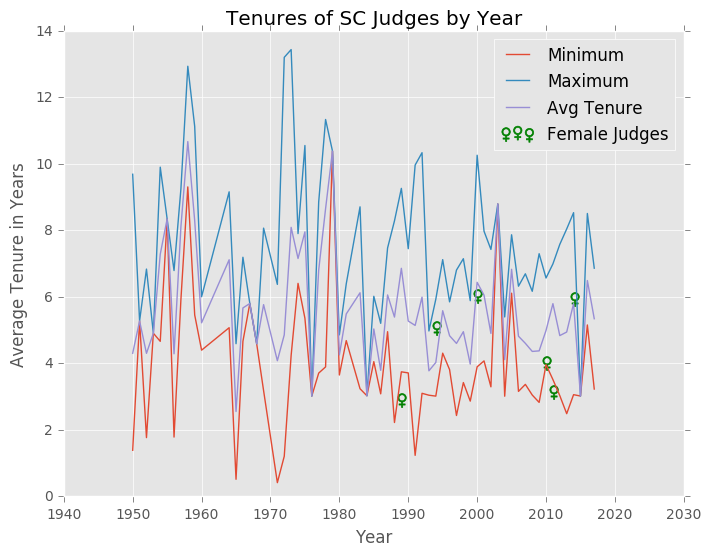

In [16]:
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(111)
plt.plot(men_min.index, men_min['tenure_years'].values, label="Minimum")

plt.plot(men_max.index, men_max['tenure_years'].values, label="Maximum")

plt.plot(men_mean.index, men_mean['tenure_years'].values, label="Avg Tenure")

plt.scatter(females['year'].values, females['tenure_years'].values,
            marker="$\u2640$", s=100, label="Female Judges", color="g")
plt.ylim(0, 14)
plt.xlabel("Year")
plt.ylabel("Average Tenure in Years")
plt.title("Tenures of SC Judges by Year")
plt.legend(loc="best")

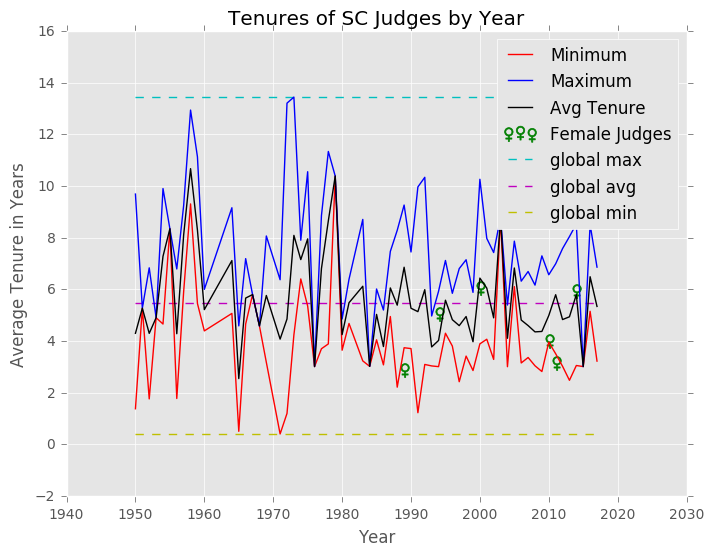

In [24]:
fig = plt.figure(figsize=(8, 6))
fig.add_subplot(111)
plt.plot(men_min.index, men_min['tenure_years'].values, label="Minimum", c="r")

plt.plot(men_max.index, men_max['tenure_years'].values, label="Maximum", c="b")

plt.plot(men_mean.index, men_mean['tenure_years'].values, label="Avg Tenure", c="k")

plt.scatter(females['year'].values, females['tenure_years'].values,
            marker="$\u2640$", s=100, label="Female Judges", color="g")
plt.hlines(df.tenure_years.max(), 1950, 2017, linestyle="dashed", colors="c", label="global max")
plt.hlines(df.tenure_years.mean(), 1950, 2017, linestyle="dashed", colors="m", label="global avg")
plt.hlines(df.tenure_years.min(), 1950, 2017, linestyle="dashed", colors="y", label="global min")
plt.xlabel("Year")
plt.ylabel("Average Tenure in Years")
plt.title("Tenures of SC Judges by Year")
plt.legend(loc="best")

In [28]:
ax.plot?